In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, accuracy_score, confusion_matrix, adjusted_rand_score, classification_report
from scipy.spatial.distance import cdist
import skfuzzy as fuzz

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset and creating a copy of the dataset
data = pd.read_csv('respiratory.csv')
df = data.copy()

In [3]:
#checking the first 5 rows of the dataset
df.head()

,Age,Body Temperature,Respiratory Rate,Heart Rate,Cough Severity,Chest Pain Severity,Oxygen Saturation,Shortness of Breath,Sputum Production,History of Smoking,History of Respiratory Infections,Exposure to Pollutants,Early Diagnosis
0,52,39.720661,22,81,5,5,93.017309,1,1,0,1,0,1
1,15,38.110352,17,80,5,3,88.044161,0,0,1,1,0,0
2,72,37.035617,14,88,2,2,93.870347,0,0,1,0,0,0
3,61,36.211307,25,104,4,1,92.541328,1,0,1,1,1,1
4,21,38.904339,13,105,2,1,92.637838,0,1,1,1,0,1


In [4]:
# Checking basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7000 non-null   int64  
 1   Body Temperature                   7000 non-null   float64
 2   Respiratory Rate                   7000 non-null   int64  
 3   Heart Rate                         7000 non-null   int64  
 4   Cough Severity                     7000 non-null   int64  
 5   Chest Pain Severity                7000 non-null   int64  
 6   Oxygen Saturation                  7000 non-null   float64
 7   Shortness of Breath                7000 non-null   int64  
 8   Sputum Production                  7000 non-null   int64  
 9   History of Smoking                 7000 non-null   int64  
 10  History of Respiratory Infections  7000 non-null   int64  
 11  Exposure to Pollutants             7000 non-null   int64

In [5]:
#checking for missing values
df.isnull().sum()

Age                                  0
Body Temperature                     0
Respiratory Rate                     0
Heart Rate                           0
Cough Severity                       0
Chest Pain Severity                  0
Oxygen Saturation                    0
Shortness of Breath                  0
Sputum Production                    0
History of Smoking                   0
History of Respiratory Infections    0
Exposure to Pollutants               0
Early Diagnosis                      0
dtype: int64

In [6]:
#normalizing the dataset
features = df.drop(columns=['Early Diagnosis'])
scaler = StandardScaler()
feature_normalized = scaler.fit_transform(features)

In [7]:
#creating a new dataframe with the normalized features
df_normalized = pd.DataFrame(feature_normalized, columns = features.columns)

In [8]:
#Adding target column to the normalized dataframe
df_normalized['Early Diagnosis'] = df['Early Diagnosis'].values

In [9]:
#checking the first 5 rows of the normalized data
df1 = df_normalized.copy()
df1.head()

,Age,Body Temperature,Respiratory Rate,Heart Rate,Cough Severity,Chest Pain Severity,Oxygen Saturation,Shortness of Breath,Sputum Production,History of Smoking,History of Respiratory Infections,Exposure to Pollutants,Early Diagnosis
0,0.284691,1.511480,0.276173,-0.481803,1.382518,1.422388,0.134659,1.013230,0.993450,-1.005443,0.994018,-1.014099,1
1,-1.160471,0.110951,-0.678970,-0.539833,1.382518,0.003749,-1.016201,-0.986942,-1.006593,0.994586,0.994018,-1.014099,0
2,1.065860,-0.823775,-1.252056,-0.075589,-0.731424,-0.705570,0.332065,-0.986942,-1.006593,0.994586,-1.006018,-1.014099,0
3,0.636217,-1.540700,0.849258,0.852900,0.677871,-1.414889,0.024510,1.013230,-1.006593,0.994586,0.994018,0.986097,1
4,-0.926120,0.801503,-1.443084,0.910931,-0.731424,-1.414889,0.046844,-0.986942,0.993450,0.994586,0.994018,-1.014099,1


### Implementing the FCM Algorithm

In [10]:
# Data for clustering (transposed)
df2 = df1.drop(columns=['Early Diagnosis']).values.T

# Number of clusters
n_clusters = 2

# Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    df2, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# Output cluster membership for each data point
cluster_membership = np.argmax(u, axis=0)

# Add the cluster membership to the original dataframe
df1['Cluster'] = cluster_membership

In [11]:
#checking the first 5 rows of the updated normalized data
df1.head()

,Age,Body Temperature,Respiratory Rate,Heart Rate,Cough Severity,Chest Pain Severity,Oxygen Saturation,Shortness of Breath,Sputum Production,History of Smoking,History of Respiratory Infections,Exposure to Pollutants,Early Diagnosis,Cluster
0,0.284691,1.511480,0.276173,-0.481803,1.382518,1.422388,0.134659,1.013230,0.993450,-1.005443,0.994018,-1.014099,1,0
1,-1.160471,0.110951,-0.678970,-0.539833,1.382518,0.003749,-1.016201,-0.986942,-1.006593,0.994586,0.994018,-1.014099,0,1
2,1.065860,-0.823775,-1.252056,-0.075589,-0.731424,-0.705570,0.332065,-0.986942,-1.006593,0.994586,-1.006018,-1.014099,0,1
3,0.636217,-1.540700,0.849258,0.852900,0.677871,-1.414889,0.024510,1.013230,-1.006593,0.994586,0.994018,0.986097,1,0
4,-0.926120,0.801503,-1.443084,0.910931,-0.731424,-1.414889,0.046844,-0.986942,0.993450,0.994586,0.994018,-1.014099,1,1


### Evaluating the Model

Cluster Accuracy: 0.50


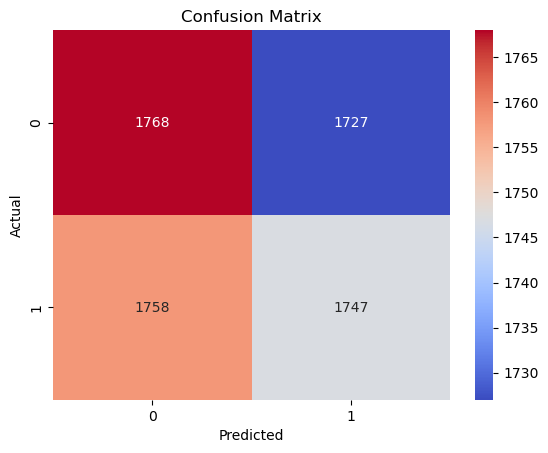

Silhouette Score: 0.06


In [12]:
#Determine the mapping based on majority label in each cluster
cluster_labels = [np.argmax(np.bincount(df1[df1['Cluster'] == i]['Early Diagnosis'])) for i in range(n_clusters)]

#Mapping the clusters to teh actual labels
mapped_clusters = [cluster_labels[cluster] for cluster in cluster_membership]

#calculate accuracy
accuracy = accuracy_score(df1['Early Diagnosis'], mapped_clusters)
print(f'Cluster Accuracy: {accuracy:.2f}')

#confusion matrix
conf_matrix = confusion_matrix(df1['Early Diagnosis'], mapped_clusters)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Silhoutte score
silhouette_avg  = silhouette_score(df2.T, cluster_membership)
print(f'Silhouette Score: {silhouette_avg:.2f}')

### Cluster Validation

In [13]:
# Davies-Bouldin score
db_score = davies_bouldin_score(df2.T, cluster_membership)
print(f'Davis-Bouldin Score: {db_score:.2f}')

#Adjusted Rand Index
ari_score = adjusted_rand_score(df1['Early Diagnosis'],cluster_membership)
print(f'Adjusted Rand Index: {ari_score:.2f}')

Davis-Bouldin Score: 4.07
Adjusted Rand Index: -0.00


### Visualization of Clustering

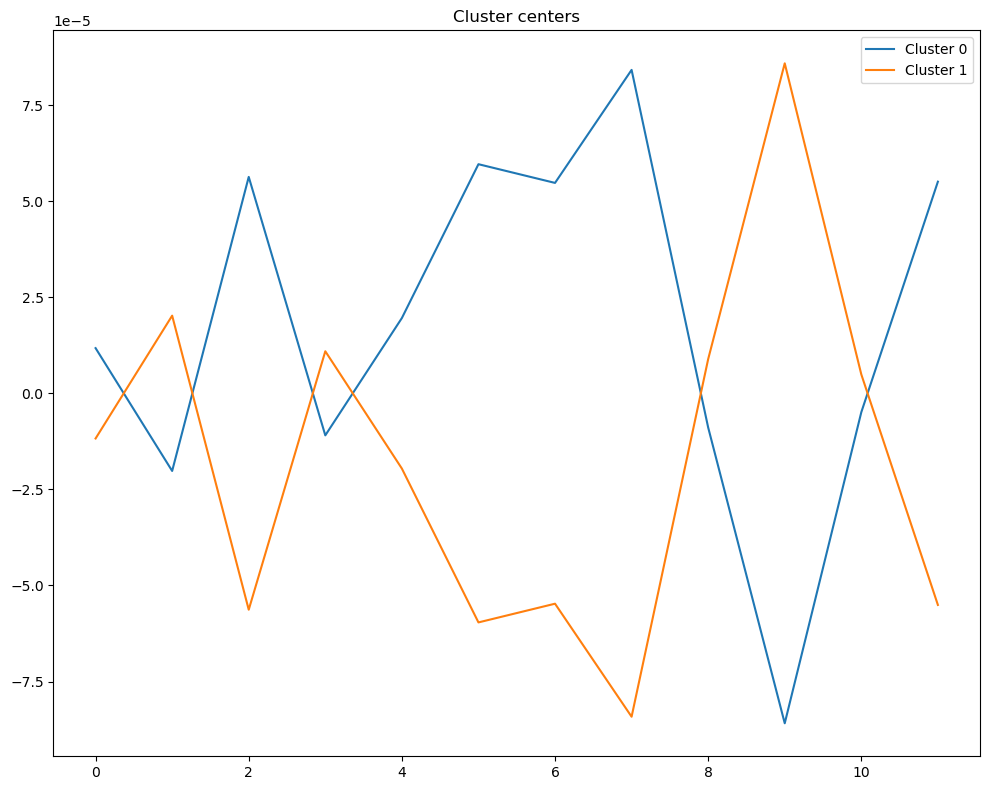

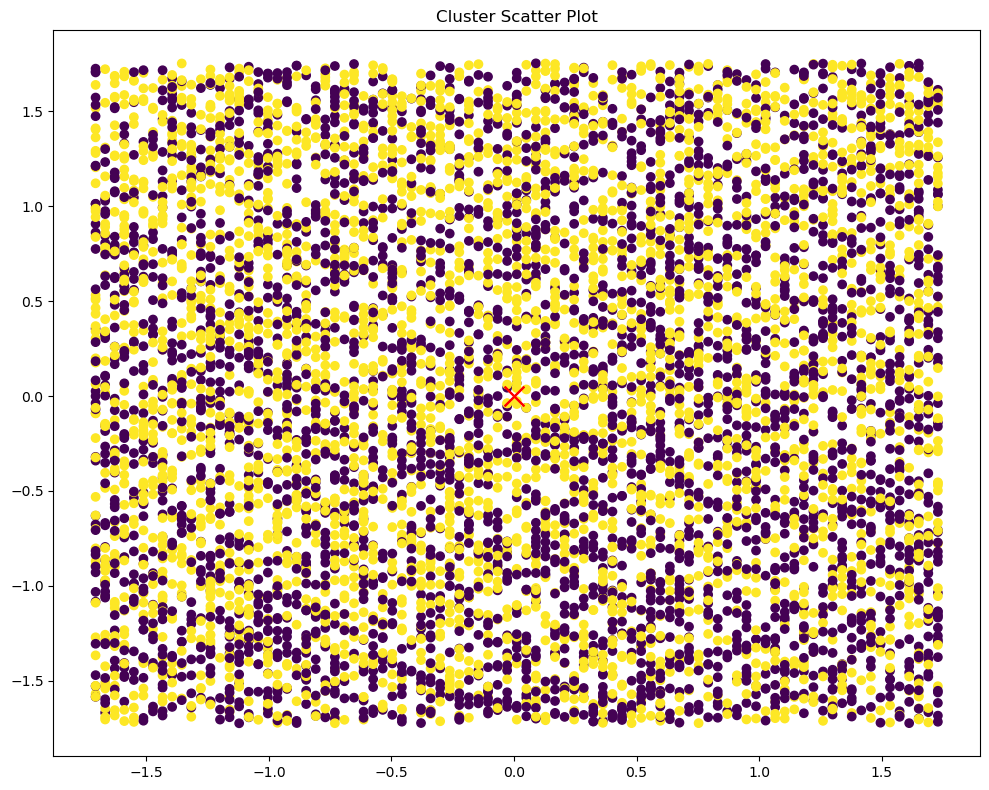

In [14]:
#plotting of clustering centre
plt.figure(figsize=(10,8))
for j in range(n_clusters):
    plt.plot(cntr[j], label=f'Cluster {j}')
plt.legend()
plt.title('Cluster centers')
plt.tight_layout()
plt.show()

#Scatter plot of clusters
plt.figure(figsize=(10, 8))
plt.scatter(df2[0], df2[1], c=cluster_membership, cmap='viridis')
plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', s=200, c='red')
plt.title('Cluster Scatter Plot')
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

In [15]:
# Function to perform hyperparameter tuning
def tune_fcm(df2, c_values, m_values, error_values, maxiter_values):
    best_params = None
    best_score = -1

    for c in c_values:
        for m in m_values:
            for error in error_values:
                for maxiter in maxiter_values:
                    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
                        df2, c=c, m=m, error=error, maxiter=maxiter, init=None)
                    cluster_membership = np.argmax(u, axis=0)
                    score = silhouette_score(df2.T, cluster_membership)
                    if score > best_score:
                        best_score = score
                        best_params = (c, m, error, maxiter)

    return best_params, best_score

# Define the hyperparameter ranges
c_values = [2, 3, 4]
m_values = [1.5, 2, 2.5]
error_values = [0.001, 0.005, 0.01]
maxiter_values = [500, 1000, 2000]

# Perform hyperparameter tuning
best_params, best_score = tune_fcm(df2, c_values, m_values, error_values, maxiter_values)
print(f'Best Parameters: c={best_params[0]}, m={best_params[1]}, error={best_params[2]}, maxiter={best_params[3]}')
print(f'Best Silhouette Score: {best_score:.2f}')

Best Parameters: c=2, m=2, error=0.005, maxiter=2000
Best Silhouette Score: 0.06


### Building Model

In [17]:
df3 = df_normalized.copy()

In [19]:
df3.head()

,Age,Body Temperature,Respiratory Rate,Heart Rate,Cough Severity,Chest Pain Severity,Oxygen Saturation,Shortness of Breath,Sputum Production,History of Smoking,History of Respiratory Infections,Exposure to Pollutants,Early Diagnosis
0,0.284691,1.511480,0.276173,-0.481803,1.382518,1.422388,0.134659,1.013230,0.993450,-1.005443,0.994018,-1.014099,1
1,-1.160471,0.110951,-0.678970,-0.539833,1.382518,0.003749,-1.016201,-0.986942,-1.006593,0.994586,0.994018,-1.014099,0
2,1.065860,-0.823775,-1.252056,-0.075589,-0.731424,-0.705570,0.332065,-0.986942,-1.006593,0.994586,-1.006018,-1.014099,0
3,0.636217,-1.540700,0.849258,0.852900,0.677871,-1.414889,0.024510,1.013230,-1.006593,0.994586,0.994018,0.986097,1
4,-0.926120,0.801503,-1.443084,0.910931,-0.731424,-1.414889,0.046844,-0.986942,0.993450,0.994586,0.994018,-1.014099,1


In [22]:
class FuzzyCMeans:
    def __init__(self, n_clusters, max_iter=100, m=2, epsilon=1e-5):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.epsilon = epsilon

    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Initialize membership matrix
        self.U = np.random.rand(n_samples, self.n_clusters)
        self.U = self.U / np.sum(self.U, axis=1)[:, np.newaxis]
        
        for _ in range(self.max_iter):
            U_old = self.U.copy()
            
            # Calculate cluster centers
            self.centers = np.dot(self.U.T ** self.m, X) / np.sum(self.U.T ** self.m, axis=1)[:, np.newaxis]
            
            # Update membership matrix
            distances = cdist(X, self.centers)
            self.U = 1 / (distances ** (2 / (self.m - 1)))
            self.U = self.U / np.sum(self.U, axis=1)[:, np.newaxis]
            
            # Check for convergence
            if np.linalg.norm(self.U - U_old) < self.epsilon:
                break

    def predict(self, X):
        distances = cdist(X, self.centers)
        return np.argmin(distances, axis=1)

In [23]:
# Prepare features and labels
X = df3.drop('Early Diagnosis', axis=1)
y = df3['Early Diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
fcm = FuzzyCMeans(n_clusters=3, max_iter=100, m=2)
fcm.fit(X_train)

In [29]:
# Make predictions
y_pred = fcm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.3350

Confusion Matrix:
[[280 198 227]
 [270 189 236]
 [  0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.40      0.45       705
           1       0.49      0.27      0.35       695
           2       0.00      0.00      0.00         0

    accuracy                           0.34      1400
   macro avg       0.33      0.22      0.27      1400
weighted avg       0.50      0.34      0.40      1400



### Making a Prediction

In [33]:
df.head()

,Age,Body Temperature,Respiratory Rate,Heart Rate,Cough Severity,Chest Pain Severity,Oxygen Saturation,Shortness of Breath,Sputum Production,History of Smoking,History of Respiratory Infections,Exposure to Pollutants,Early Diagnosis
0,52,39.720661,22,81,5,5,93.017309,1,1,0,1,0,1
1,15,38.110352,17,80,5,3,88.044161,0,0,1,1,0,0
2,72,37.035617,14,88,2,2,93.870347,0,0,1,0,0,0
3,61,36.211307,25,104,4,1,92.541328,1,0,1,1,1,1
4,21,38.904339,13,105,2,1,92.637838,0,1,1,1,0,1


In [35]:
input_data = (52,39.7,22,81,5,5,93.0,1,1,0,1,0)
disease_mapping = {
    0: 'no Disease',
    1: 'Acute Respiratory Disease'
}
#convert input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array since we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = fcm.predict(input_data_reshaped)

predicted_disease = disease_mapping[prediction[0]]

if (prediction[0]==0):
    print(f'This patient has  {predicted_disease}')
else:
    print(f'This patient has a {predicted_disease}')

This patient has a Acute Respiratory Disease
